In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy 
import glob

simroot = uproot.open("/Volumes/T7/ROOTfiles/SIMC/LH2/lh2_3p632gev_7p87deg.root")
dataroot = uproot.open("/Volumes/T7/ROOTfiles/LH2/-3p632gev7p87deg/coin_replay_production_24155_-1.root")
dummyroot = uproot.open("/Volumes/T7/ROOTfiles/dummy/-3p632gev7p87deg/coin_replay_production_24171_-1.root")


simtree = simroot["h10"]
tree = dataroot["T"]
dummytree = dummyroot["T"]

# Simulation trees

hsdelta = simtree["hsdelta"].array(library="np")
# stop_id = simtree["stop_id"].array(library="np")
hsytar = simtree["hsytar"].array(library="np")
hsxptar = simtree["hsxptar"].array(library="np")
hsyptar = simtree["hsyptar"].array(library="np")
hsxpfp = simtree["hsxpfp"].array(library="np")
hsypfp = simtree["hsypfp"].array(library="np")
sweights = simtree["Weight"].array(library="np")

psdelta = simtree["ssdelta"].array(library="np")
# stop_id = simtree["stop_id"].array(library="np")
psytar = simtree["ssytar"].array(library="np")
psxptar = simtree["ssxptar"].array(library="np")
psyptar = simtree["ssyptar"].array(library="np")
psxpfp = simtree["ssxpfp"].array(library="np")
psypfp = simtree["ssypfp"].array(library="np")
sweights = simtree["Weight"].array(library="np")

# LH2 trees

htardp = tree["H.gtr.dp"].array(library="np")
hxtar = tree["H.gtr.x"].array(library="np")
hytar = tree["H.gtr.y"].array(library="np")
htarth = tree["H.gtr.th"].array(library="np")
htarph = tree["H.gtr.ph"].array(library="np")
hmsCal = tree["H.cal.etottracknorm"].array(library="np")
hxfp = tree["H.dc.x_fp"].array(library="np")
hyfp = tree["H.dc.y_fp"].array(library="np")
hxpfp = tree["H.dc.xp_fp"].array(library="np")
hypfp = tree["H.dc.yp_fp"].array(library="np")
Qtree = tree["H.kin.primary.Q2"].array(library="np")
hcer = tree["H.cer.npeSum"].array(library="np")

ptardp = tree["P.gtr.dp"].array(library="np")
pxtar = tree["P.gtr.x"].array(library="np")
pytar = tree["P.gtr.y"].array(library="np")
ptarth = tree["P.gtr.th"].array(library="np")
ptarph = tree["P.gtr.ph"].array(library="np")
shmsCal = tree["P.cal.etottracknorm"].array(library="np")
pxfp = tree["P.dc.x_fp"].array(library="np")
pyfp = tree["P.dc.y_fp"].array(library="np")
pxpfp = tree["P.dc.xp_fp"].array(library="np")
pypfp = tree["P.dc.yp_fp"].array(library="np")
# Qtree = tree["H.kin.primary.Q2"].array(library="np")
phgcer = tree["P.hgcer.npeSum"].array(library="np")
pngcer = tree["P.ngcer.npeSum"].array(library="np")

# Dummy trees

dhtardp = dummytree["H.gtr.dp"].array(library="np")
dhxtar = dummytree["H.gtr.x"].array(library="np")
dhytar = dummytree["H.gtr.y"].array(library="np")
dhtarth = dummytree["H.gtr.th"].array(library="np")
dhtarph = dummytree["H.gtr.ph"].array(library="np")
dhmsCal = dummytree["H.cal.etottracknorm"].array(library="np")
dhxfp = dummytree["H.dc.x_fp"].array(library="np")
dhyfp = dummytree["H.dc.y_fp"].array(library="np")
dhxpfp = dummytree["H.dc.xp_fp"].array(library="np")
dhypfp = dummytree["H.dc.yp_fp"].array(library="np")
dQtree = dummytree["H.kin.primary.Q2"].array(library="np")
dhcer = dummytree["H.cer.npeSum"].array(library="np")

dptardp = dummytree["P.gtr.dp"].array(library="np")
dpxtar = dummytree["P.gtr.x"].array(library="np")
dpytar = dummytree["P.gtr.y"].array(library="np")
dptarth = dummytree["P.gtr.th"].array(library="np")
dptarph = dummytree["P.gtr.ph"].array(library="np")
dshmsCal = dummytree["P.cal.etottracknorm"].array(library="np")
dpxfp = dummytree["P.dc.x_fp"].array(library="np")
dpyfp = dummytree["P.dc.y_fp"].array(library="np")
dpxpfp = dummytree["P.dc.xp_fp"].array(library="np")
dpypfp = dummytree["P.dc.yp_fp"].array(library="np")
# Qtree = tree["H.kin.primary.Q2"].array(library="np")
dphgcer = dummytree["P.hgcer.npeSum"].array(library="np")
dpngcer = dummytree["P.ngcer.npeSum"].array(library="np")




hCharge = 51.032 # mC
pCharge = 51.110 # mC
hdCharge = 49.897 #mC
pdCharge = 49.804 #mC

Al_thick = 0.184 # mm
dummy_thick = 0.60605 # mm

R = Al_thick/dummy_thick 



# normfac = 0.114899E+12
normfac = 0.838913E+11

hEff = 0.9989
pEff = 0.9574
hdEff = 0.9986
pdEff = 0.9626


xptar = np.tan(htarth)
yptar = np.tan(htarph)



hcuts_sim = (hsdelta > -8) & (hsdelta < 8)
pcuts_sim = (psdelta > -10) & (psdelta < 22)
cuts_data = (htardp > -8) & (htardp < 8) & (hmsCal > 0.7) & (ptardp > -10) & (ptardp < 22) & (hcer > 2) & (shmsCal > 0.7) & (pngcer > 2)
#& (xptar > -0.07) & (xptar < 0.07) & (yptar > -0.04) & (yptar < 0.07)

cuts_dummy = (dhtardp > -8) & (dhtardp < 8) & (dhmsCal > 0.7) & (dptardp > -10) & (dptardp < 22) & (dhcer > 2) & (dshmsCal > 0.7) & (dpngcer >2)

hnentries = len(hsdelta[hcuts_sim])
pnentries = len(psdelta[pcuts_sim])

bin_counts_deltasim, bin_edges_deltasim = np.histogram(hsdelta[hcuts_sim], weights=sweights[hcuts_sim], bins=100)
bin_counts_delta, bin_edges_delta = np.histogram(htardp[cuts_data], bins=100)
bin_counts_dummy, bin_edges_dummy = np.histogram(dhtardp[cuts_dummy], bins=100)


bin_centers_sim = (bin_edges_deltasim[1:] + bin_edges_deltasim[:-1])/2
bin_centers_data = (bin_edges_delta[1:] + bin_edges_delta[:-1])/2
bin_centers_dummy = (bin_edges_dummy[1:] + bin_edges_dummy[:-1])/2


plt.hist(bin_centers_data, bins=len(bin_centers_data), histtype='step', weights=bin_counts_delta/(hCharge*hEff), color='black', label="Data");
plt.hist(bin_centers_dummy, bins=len(bin_centers_dummy), histtype='step', weights=bin_counts_delta/(hdCharge*hdEff), color='red', label="Dummy");
plt.hist(bin_centers_sim, bins=len(bin_centers_sim), histtype='step', weights=bin_counts_deltasim*(normfac/hnentries), linestyle='-', color='navy', label="SIMC");
plt.title("HMS delta")
plt.xlabel("Delta")
plt.ylabel("Counts")
# plt.yscale('log')
plt.legend()

KeyboardInterrupt: 

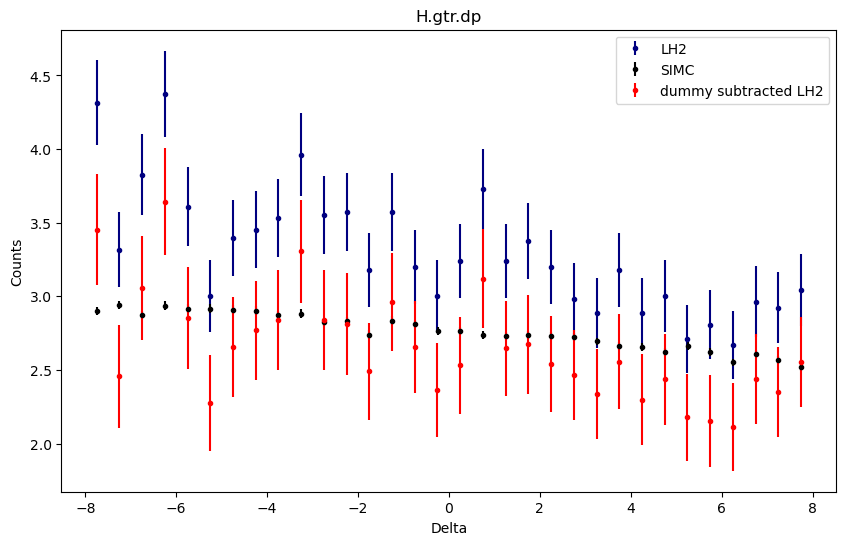

In [ ]:
dummy_scale, data_scale = np.empty_like(dhtardp[cuts_dummy]), np.empty_like(htardp[cuts_data])

for i in range(len(dhtardp[cuts_dummy])):
    dummy_scale[i] =  1 / (hdCharge * hdEff)

for i in range(len(htardp[cuts_data])):
    data_scale[i] = 1 / (hCharge * hEff)


def histogram(data, weights, bins):
    counts, bin_edges = np.histogram(data,  weights=weights, bins=bins)
    sumw2, _ = np.histogram(data, bins=bins, weights=weights**2)
    errors = np.sqrt(sumw2)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    return bin_centers, counts, errors

bin_centers_dummy, bin_counts_dummy, dummy_error = histogram(dhtardp[cuts_dummy], weights=dummy_scale, bins=32)

bin_centers_data, bin_counts_data, data_error = histogram(htardp[cuts_data], weights=data_scale, bins=32)

bin_centers_sim, bin_counts_sim, sim_error = histogram(hsdelta[hcuts_sim], weights=sweights[hcuts_sim]*normfac/hnentries, bins=32)



bin_counts_sub = bin_counts_data - R * bin_counts_dummy
_ , bin_edges_sub = np.histogram(htardp[cuts_data], bins=32)
bin_centers_sub = 0.5 * (bin_edges_sub[1:] + bin_edges_sub[:-1])
sub_error = np.sqrt(data_error**2 + dummy_error**2)



plt.figure(figsize=(10, 6))

# plt.hist(bin_centers_sim, histtype='step', weights=bin_counts_sim, color='black', label="SIMC");
# plt.hist(bin_centers_sim, bins=len(bin_centers_sim), histtype='step', weights=bin_counts_deltasim*(normfac/nentriesHMS), linestyle='-', color='black', label="SIMC");
# plt.errorbar(bin_centers_simdp, bin_counts_simdp, fmt='+', label='MC')

# plt.errorbar(bin_centers_dummy, bin_counts_dummy,yerr=dummy_error,fmt='.', label="Dummy")
plt.errorbar(bin_centers_data, bin_counts_data,yerr=data_error,fmt='.', color='navy',label='LH2')
plt.errorbar(bin_centers_sim, bin_counts_sim,yerr=sim_error,fmt='.', color = 'black',label='SIMC')
plt.errorbar(bin_centers_sub, bin_counts_sub,yerr=sub_error,fmt='.', color = 'red',label='dummy subtracted LH2')

plt.title("H.gtr.dp")
plt.xlabel("Delta")
plt.ylabel("Counts")
# plt.yscale("log")
plt.legend()

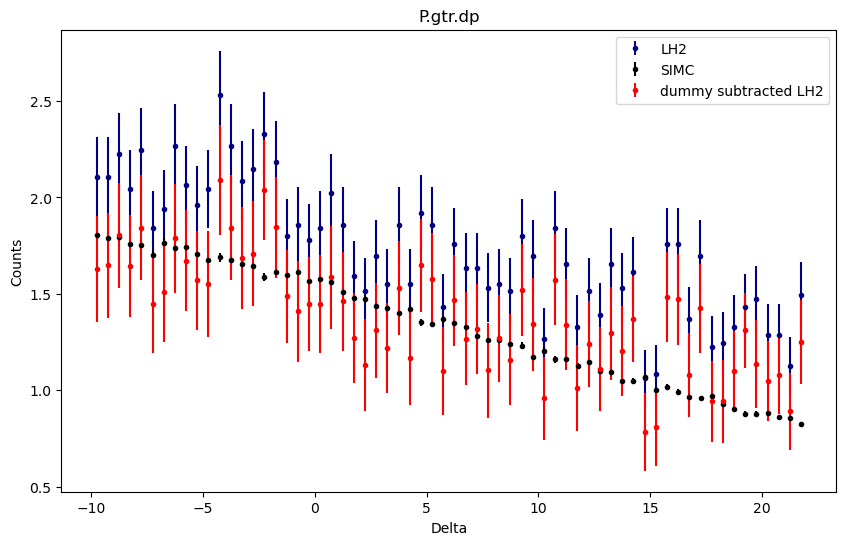

In [ ]:
dummy_scale, data_scale = np.empty_like(dptardp[cuts_dummy]), np.empty_like(ptardp[cuts_data])

for i in range(len(dptardp[cuts_dummy])):
    dummy_scale[i] =  1 / (pdCharge * pdEff)

for i in range(len(ptardp[cuts_data])):
    data_scale[i] = 1 / (pCharge * pEff)


bin_centers_dummy, bin_counts_dummy, dummy_error = histogram(dptardp[cuts_dummy], weights=dummy_scale, bins=64)

bin_centers_data, bin_counts_data, data_error = histogram(ptardp[cuts_data], weights=data_scale, bins=64)

bin_centers_sim, bin_counts_sim, sim_error = histogram(psdelta[pcuts_sim], weights=sweights[pcuts_sim]*normfac/pnentries, bins=64)


bin_counts_sub = bin_counts_data - R * bin_counts_dummy
_ , bin_edges_sub = np.histogram(ptardp[cuts_data], bins=64)
bin_centers_sub = 0.5 * (bin_edges_sub[1:] + bin_edges_sub[:-1])
sub_error = np.sqrt(data_error**2 + dummy_error**2)



plt.figure(figsize=(10, 6))

# plt.hist(bin_centers_sim, histtype='step', weights=bin_counts_sim, color='black', label="SIMC");
# plt.hist(bin_centers_sim, bins=len(bin_centers_sim), histtype='step', weights=bin_counts_deltasim*(normfac/nentriesHMS), linestyle='-', color='black', label="SIMC");
# plt.errorbar(bin_centers_simdp, bin_counts_simdp, fmt='+', label='MC')

# plt.errorbar(bin_centers_dummy, bin_counts_dummy,yerr=dummy_error,fmt='.', label="Dummy")
plt.errorbar(bin_centers_data, bin_counts_data,yerr=data_error,fmt='.', color='navy',label='LH2')
plt.errorbar(bin_centers_sim, bin_counts_sim,yerr=sim_error,fmt='.', color = 'black',label='SIMC')
plt.errorbar(bin_centers_sub, bin_counts_sub,yerr=sub_error,fmt='.', color = 'red',label='dummy subtracted LH2')

plt.title("P.gtr.dp")
plt.xlabel("Delta")
plt.ylabel("Counts")
# plt.yscale("log")
plt.legend()